In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/leaf-data/leaf/leaf.csv
/kaggle/input/leaf-data/leaf/ReadMe.pdf
/kaggle/input/leaf-data/leaf/BW/9. Betula pubescens/iPAD2_C09_EX02_B.TIFF
/kaggle/input/leaf-data/leaf/BW/9. Betula pubescens/iPAD2_C09_EX07_B.TIFF
/kaggle/input/leaf-data/leaf/BW/9. Betula pubescens/iPAD2_C09_EX10_B.TIFF
/kaggle/input/leaf-data/leaf/BW/9. Betula pubescens/iPAD2_C09_EX08_B.TIFF
/kaggle/input/leaf-data/leaf/BW/9. Betula pubescens/iPAD2_C09_EX14_B.TIFF
/kaggle/input/leaf-data/leaf/BW/9. Betula pubescens/iPAD2_C09_EX09_B.TIFF
/kaggle/input/leaf-data/leaf/BW/9. Betula pubescens/iPAD2_C09_EX04_B.TIFF
/kaggle/input/leaf-data/leaf/BW/9. Betula pubescens/iPAD2_C09_EX03_B.TIFF
/kaggle/input/leaf-data/leaf/BW/9. Betula pubescens/iPAD2_C09_EX01_B.TIFF
/kaggle/input/leaf-data/leaf/BW/9. Betula pubescens/iPAD2_C09_EX06_B.TIFF
/kaggle/input/leaf-data/leaf/BW/9. Betula pubescens/iPAD2_C09_EX05_B.TIFF
/kaggle/input/leaf-data/leaf/BW/9. Betula pubescens/iPAD2_C09_EX11_B.TIFF
/kaggle/input/leaf-data/leaf/BW/9.

In [2]:
#datset link : https://archive.ics.uci.edu/dataset/288/leaf
import os

directories = [
    "1. Quercus suber",
    "2. Salix atrocinerea",
    "3. Populus nigra",
    "4. Alnus sp",
    "5. Quercus robur",
    "6. Crataegus monogyna",
    "7. Ilex aquifolium",
    "8. Nerium oleander",
    "9. Betula pubescens",
    "10. Tilia tomentosa",
    "11. Acer palmaturu",
    "12. Celtis sp",
    "13. Corylus avellana",
    "14. Castanea sativa",
    "15. Populus alba",
    "22. Primula vulgaris",
    "23. Erodium sp",
    "24. Bougainvillea sp",
    "25. Arisarum vulgare",
    "26. Euonymus japonicus",
    "27. Ilex perado ssp azorica",
    "28. Magnolia soulangeana",
    "29. Buxus sempervirens",
    "30. Urtica dioica",
    "31. Podocarpus sp",
    "32. Acca sellowiana",
    "33. Hydrangea sp",
    "34. Pseudosasa japonica",
    "35. Magnolia grandiflora",
    "36. Geranium sp"
]

# Sort the directories in ascending order based on the first number label
#directories.sort(key=lambda x: int(x.split()[0]))

# Create an empty list to store the file paths
file_paths = []

# Directory where your data is located
data_directory = '/kaggle/input/leaf-data/leaf/RGB'

# Iterate through the directories and collect file paths
for directory in directories:
    # Construct the full directory path
    full_directory_path = os.path.join(data_directory, directory)
    
    # Check if the directory exists
    if os.path.exists(full_directory_path):
        # List all files in the directory
        files = os.listdir(full_directory_path)
        
        # Construct the full file paths and add them to the list
        full_file_paths = [os.path.join(full_directory_path, file) for file in files]
        file_paths.extend(full_file_paths)

# Now, the 'file_paths' list contains the file paths for all the directories in 'directories'


In [3]:
from PIL import Image
import os

# Define the directory where you want to save the resized images
resized_directory = 'Resized_images_RGB'

# Create the resized directory if it doesn't exist
if not os.path.exists(resized_directory):
    os.makedirs(resized_directory)

# Define the desired size for the resized images
new_size = (30, 30)

# Create an empty list to store the file paths of resized images
resized_file_paths = []

# Iterate through the list of file paths
for file_path in file_paths:
    # Get the directory name from the file path
    directory_name = os.path.dirname(file_path)

    # Extract the class name from the directory name
    class_name = os.path.basename(directory_name)

    # Create a directory for the current class in the resized directory
    class_resized_directory = os.path.join(resized_directory, class_name)
    if not os.path.exists(class_resized_directory):
        os.makedirs(class_resized_directory)

    # Get a list of image files in the original directory
    image_files = [f for f in os.listdir(directory_name) if f.endswith('.JPG')]

    # Loop through each image and resize it
    for image_file in image_files:
        # Open the original image
        original_image = Image.open(os.path.join(directory_name, image_file))

        # Resize the image
        resized_image = original_image.resize(new_size)

        # Define the file path for the resized image
        resized_image_path = os.path.join(class_resized_directory, image_file)

        # Save the resized image to the resized directory for the current class
        resized_image.save(resized_image_path)

        # Append the resized file path to the list
        resized_file_paths.append(resized_image_path)

        # Close the images
        original_image.close()
        resized_image.close()

print("Resizing complete.")



Resizing complete.


In [4]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your dataset directory
dataset_dir = '/kaggle/working/Resized_images_RGB'

# Initialize lists to store images and labels
images = []
labels = []

# Iterate through subdirectories (each representing a class)
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_dir):
        for image_file in os.listdir(class_dir):
            if image_file.endswith('.JPG'):  # Ensure you process image files only
                image_path = os.path.join(class_dir, image_file)
                image = cv2.imread(image_path)  # Load the image
                image = image / 255.0  # Normalize pixel values to [0, 1]
                images.append(image)
                labels.append(class_name)  # Use class name as the label

# Convert the lists to NumPy arrays
images = np.array(images)
class_names = [
    "1. Quercus suber",
    "2. Salix atrocinerea",
    "3. Populus nigra",
    "4. Alnus sp",
    "5. Quercus robur",
    "6. Crataegus monogyna",
    "7. Ilex aquifolium",
    "8. Nerium oleander",
    "9. Betula pubescens",
    "10. Tilia tomentosa",
    "11. Acer palmaturu",
    "12. Celtis sp",
    "13. Corylus avellana",
    "14. Castanea sativa",
    "15. Populus alba",
    "22. Primula vulgaris",
    "23. Erodium sp",
    "24. Bougainvillea sp",
    "25. Arisarum vulgare",
    "26. Euonymus japonicus",
    "27. Ilex perado ssp azorica",
    "28. Magnolia soulangeana",
    "29. Buxus sempervirens",
    "30. Urtica dioica",
    "31. Podocarpus sp",
    "32. Acca sellowiana",
    "33. Hydrangea sp",
    "34. Pseudosasa japonica",
    "35. Magnolia grandiflora",
    "36. Geranium sp"
]

# Create a mapping from class names to labels
class_name_to_label = {class_name: label for label, class_name in enumerate(class_names)}
# Use the mapping to encode the labels
encoded_labels = [class_name_to_label[class_name] for class_name in labels]
encoded_labels = np.array(encoded_labels)

# Define the data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create an ImageDataGenerator iterator
datagen.fit(images)

# Define the number of augmented samples you want to generate per original image
augmentation_factor = 10 #8 #6 # Adjust this number as needed ..10 is the best

# Generate augmented images
augmented_images = []
augmented_labels = []

for x, y in zip(images, encoded_labels):
    x = x.reshape((1,) + x.shape)  # Reshape the image for the datagen
    i = 0
    for batch in datagen.flow(x, batch_size=1):
        augmented_images.append(batch[0])
        augmented_labels.append(y)
        i += 1
        if i >= augmentation_factor:
            break
augmented_images=np.array(augmented_images)
augmented_labels=np.array(augmented_labels)

# Concatenate original and augmented data
X_augmented = np.concatenate([images, augmented_images])
y_augmented = np.concatenate([encoded_labels, augmented_labels])

# Split the augmented dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_augmented, y_augmented, test_size=0.2, random_state=42)

# Now, X_train and y_train are ready for use in your machine learning model.
print("Data Ready for training")

Data Ready for training


In [5]:
#print(augmented_images)
print(len(augmented_images))
print(images.shape)
print(encoded_labels.shape)
print(augmented_labels.shape)
print("X_train",X_train.shape)
print(X_test.shape)
print("Y_train",y_train.shape)
print(y_test.shape)

3400
(340, 30, 30, 3)
(340,)
(3400,)
X_train (2992, 30, 30, 3)
(748, 30, 30, 3)
Y_train (2992,)
(748,)


**Representative code block**

Epoch 1/100
399 steps - train_accuracy: 0.1095 - val_accuracy: 0.0401
Epoch 2/100
399 steps - train_accuracy: 0.1638 - val_accuracy: 0.1803
Epoch 3/100
399 steps - train_accuracy: 0.2311 - val_accuracy: 0.1953
Epoch 4/100
399 steps - train_accuracy: 0.2570 - val_accuracy: 0.2371
Epoch 5/100
399 steps - train_accuracy: 0.2992 - val_accuracy: 0.3689
Epoch 6/100
399 steps - train_accuracy: 0.3172 - val_accuracy: 0.4073
Epoch 7/100
399 steps - train_accuracy: 0.3502 - val_accuracy: 0.2788
Epoch 8/100
399 steps - train_accuracy: 0.3702 - val_accuracy: 0.4457
Epoch 9/100
399 steps - train_accuracy: 0.3962 - val_accuracy: 0.3740
Epoch 10/100
399 steps - train_accuracy: 0.4471 - val_accuracy: 0.3556
Epoch 11/100
399 steps - train_accuracy: 0.4739 - val_accuracy: 0.4958
Epoch 12/100
399 steps - train_accuracy: 0.4735 - val_accuracy: 0.1152
Epoch 13/100
399 steps - train_accuracy: 0.4802 - val_accuracy: 0.5409
Epoch 14/100
399 steps - train_accuracy: 0.5244 - val_accuracy: 0.3873
Epoch 15/100
39

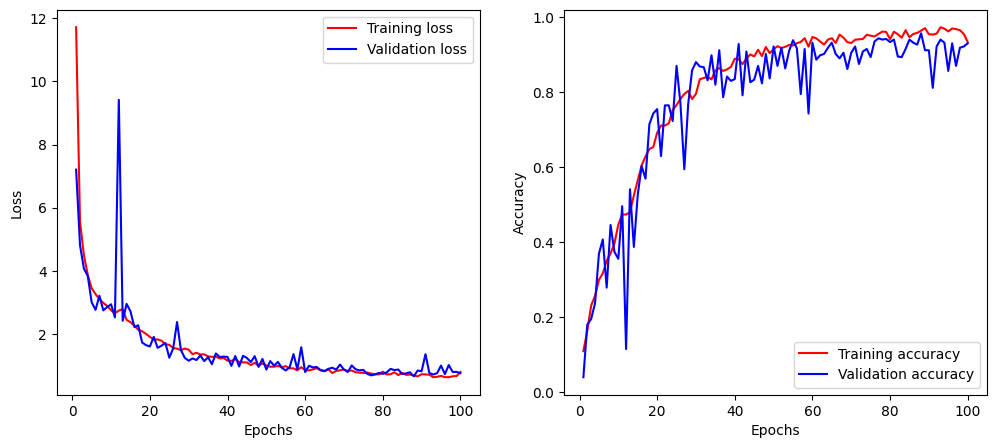

Test Accuracy: 0.9131016135215759
Train Accuracy: 0.811600498855114
Validation Accuracy: 0.7833388996869326
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 15, 15, 64)       256       
 hNormalizatio

In [6]:
#base model at (6,0.01,0.01, acc=0.934,100eps);

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

# Define Hyperparameters
batch_size = 6
regularization = 0.01
dropout_prob = 0.01   # Adjust the dropout probability as needed, here after trial and error, the quoted numbers have been chosen.

# Define a custom callback to print epoch-wise progress
class CustomCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 1 == 0:
            train_acc = logs['accuracy']
            val_acc = logs['val_accuracy']
            print(f'Epoch {epoch + 1}/{self.params["epochs"]}')
            print(f'{self.params["steps"]} steps - train_accuracy: {train_acc:.4f} - val_accuracy: {val_acc:.4f}')

# Define and compile your model with L1 weight regularization, batch normalization, dropout layers, and an additional CNN layer
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(30, 30, 3), padding='same'),  # Added 'same' padding
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),  # Added 'same' padding
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),  # Added 'same' padding
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),  # Added 'same' padding
    layers.BatchNormalization(),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),  # Add a new convolutional layer
    layers.BatchNormalization(), 
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),  # Add a new convolutional layer
    layers.BatchNormalization(), 
    
    layers.Conv2D(30, (3, 3), activation='relu', padding='same'),  # Added 'same' padding
    layers.BatchNormalization(),
    layers.Flatten(),

    
    layers.Dense(30, activation='relu', kernel_regularizer=regularizers.l1(regularization)),
    layers.BatchNormalization(),
    layers.Dropout(dropout_prob),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1(regularization)),
    layers.BatchNormalization(),
    layers.Dropout(dropout_prob),
    layers.Dense(30, activation='softmax', kernel_regularizer=regularizers.l1(regularization))
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Create an instance of the custom callback
custom_callback = CustomCallback()

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=batch_size, validation_split=0.2, verbose=0, callbacks=[custom_callback])

# Plot learning curves
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
#plt.plot('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
#plt.plot('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_acc}')
print(f'Train Accuracy: {np.mean(train_accuracy)}')
print(f'Validation Accuracy: {np.mean(val_accuracy)}')

# Save the model
model.save('image_classification_model.h5')
model.summary()

The following block is used for predictions, the user is expected to input a coloured JPEG image's path file as the input and the model predicts the tree species it belongs to out of the 30 species that have been used in the training.

In [7]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load your trained model
model = keras.models.load_model('image_classification_model.h5')

# Function to preprocess the input image
def preprocess_input_image(image_path):
    # Load the image and resize it to match the model's input size
    img = image.load_img(image_path, target_size=(30, 30))
    
    # Convert the image to a NumPy array
    img_array = image.img_to_array(img)
    
    # Expand the dimensions to match the model's input shape
    img_array = np.expand_dims(img_array, axis=0)
    
    # Normalize the image as you did during training
    img_array = img_array / 255.0
    
    return img_array

# Define the path to your input image
input_image_path = "/kaggle/input/leaf-data/leaf/RGB/36. Geranium sp/iPAD2_C36_EX01.JPG"  # Replace with the actual path

# Preprocess the input image
input_image = preprocess_input_image(input_image_path)

# Make predictions using the model
predictions = model.predict(input_image)

# Decode the predictions to get the class label
predicted_label = class_names[np.argmax(predictions)]

# Print the predicted class label
print("Predicted Class Label:", predicted_label)


1/1 [==============================] - 0s 301ms/step
Predicted Class Label: 36. Geranium sp
